In [1]:
from indexing import Doc_id, Token, Frequency
fidx: dict[Token, dict[Doc_id, Frequency]] = eval(open(f'fidx.txt', encoding="utf-8").read())
cf: dict[Token, int] = {token: sum(fidx[token].values()) for token in fidx}
with open(f'vocabulary.txt', 'w', encoding="utf-8") as file:
	file.write(str(cf))

In [2]:
import pandas as pd
cfdf = pd.DataFrame(list(cf.items()), columns=['Tokens', 'Frequency'])
cfdf.sort_values(by=['Frequency'], ascending=False, inplace=True, ignore_index=True)
cfdf = cfdf.iloc[0:50]

<Axes: ylabel='Tokens'>

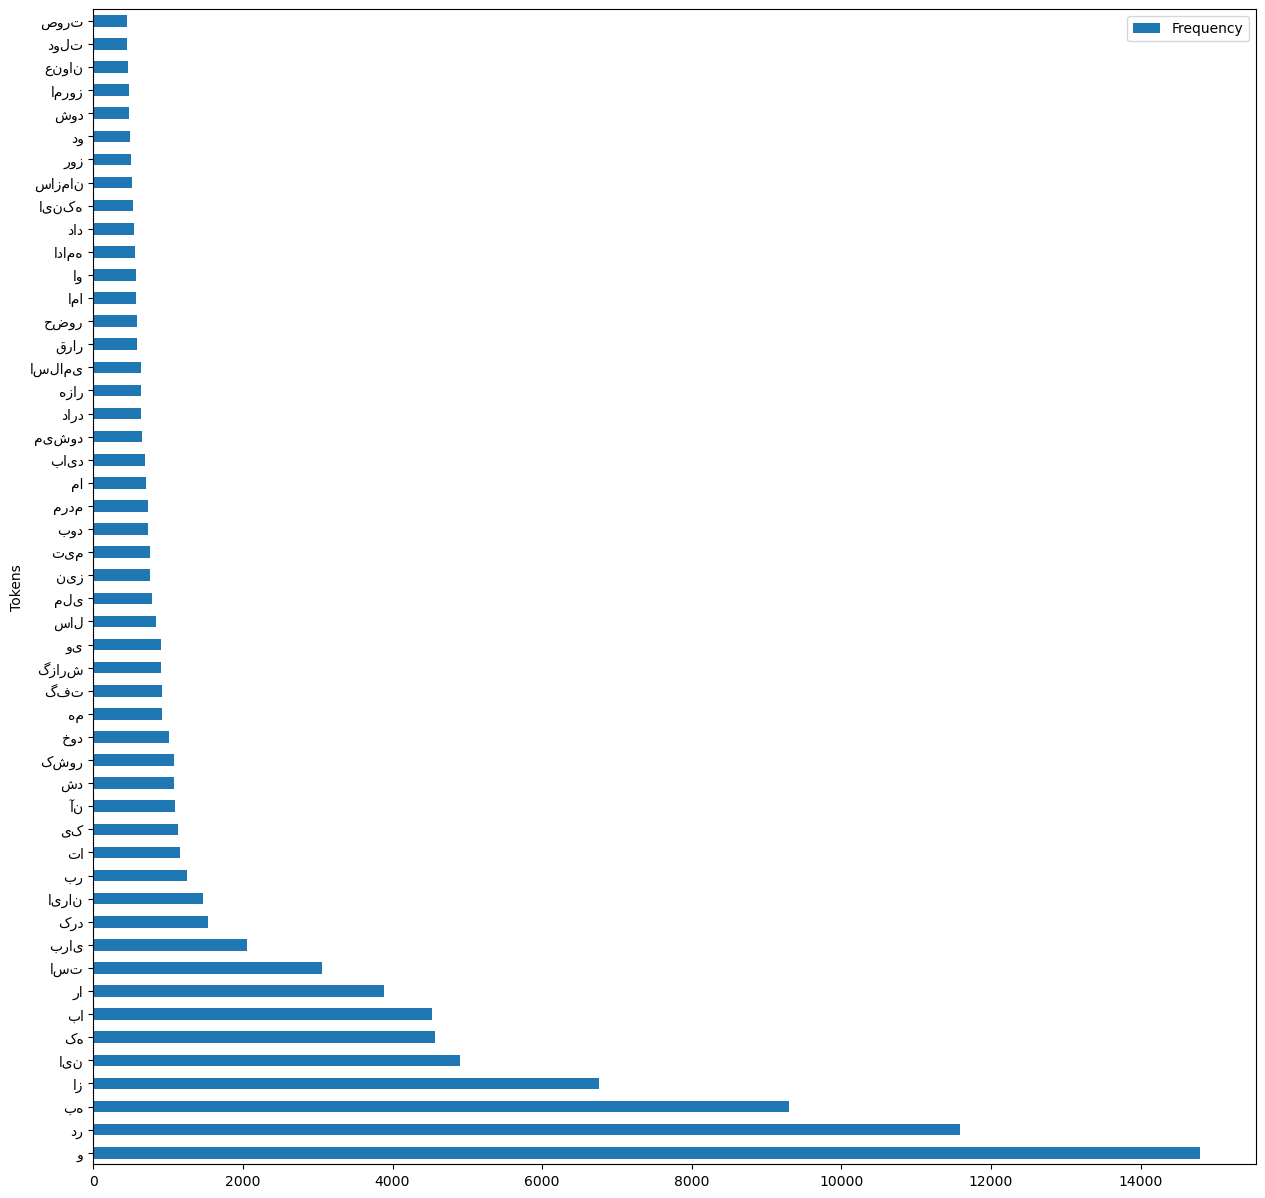

In [4]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
persian_labels = [get_display(reshape(label)) for label in cfdf["Tokens"]]
cfdf.plot.barh(x='Tokens', figsize=(15, 15))